# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


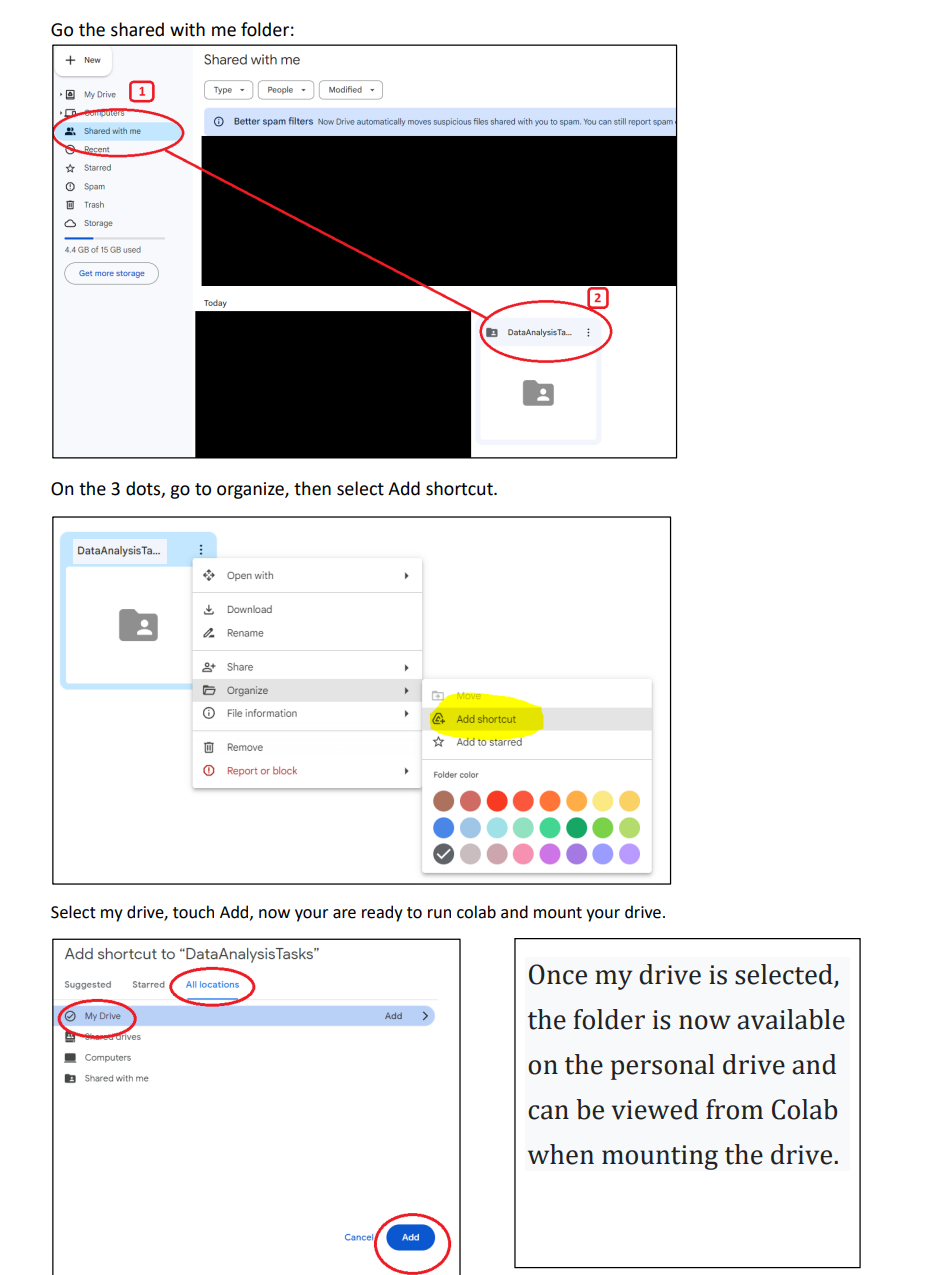

In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [4]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [10]:
import pandas as pd

from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, RangeTool
from bokeh.plotting import figure, show

output_notebook()

# Load the CSV file while parsing dates
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/brentoilprices.csv", parse_dates=["Date"])

# Create an object from the ColumnDataSource class
source = ColumnDataSource(df)

# Extract dates
dates = df["Date"].values

# Create the main figure and disable the toolbar
p = figure(height=300,
           width=800,
           tools="xpan",
           toolbar_location=None,
           x_axis_type="datetime",
           x_axis_location="above",
           background_fill_color="#efefef",
           x_range=(dates[-2000], dates[-1]))

# Create a line glyph in the main figure
p.line(x="Date", y="Price", line_width=2, source=source)
p.yaxis.axis_label = "Price"

# Create another figure for the range tool
select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130,
                width=800,
                y_range=p.y_range,
                x_axis_type="datetime",
                y_axis_type=None,
                tools="",
                toolbar_location=None,
                background_fill_color="#efefef")

# Create the range tool
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

# Create another line glyph in the new figure
select.line(x="Date", y="Price", source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)

# Set the tooltips, and the hover tool with the `vline` mode and datetime formatting for the X-axis
TOOLTIPS = [("Date", "@Date{%F}"), ("Price", "$@{Price}{0,0.00}")]
hover_tool = HoverTool(tooltips=TOOLTIPS, formatters={"@Date": "datetime"}, mode="vline")
p.add_tools(hover_tool)

# Show the result
show(column(p, select))